In [1]:
import argparse
from utils import prepare_save_dir
from STELLAR import STELLAR
import numpy as np
import torch
from datasets import CodexGraphDataset, load_tonsilbe_data, load_hubmap_data
import pandas as pd
import anndata
import scanpy as sc
import pickle

In [5]:
parser = argparse.ArgumentParser(description='STELLAR')
parser.add_argument('--dataset', default='TonsilBE', help='dataset setting')
parser.add_argument('--seed', type=int, default=1, metavar='S', help='random seed (default: 1)')
parser.add_argument('--name', type=str, default='STELLAR')
parser.add_argument('--epochs', type=int, default=50)
parser.add_argument('--lr', type=float, default=1e-3)
parser.add_argument('--wd', type=float, default=5e-2)
parser.add_argument('--input-dim', type=int, default=44)
parser.add_argument('--num-heads', type=int, default=13)
parser.add_argument('--num-seed-class', type=int, default=3)
parser.add_argument('--sample-rate', type=float, default=0.5)
parser.add_argument('-b', '--batch-size', default=1, type=int,
                metavar='N',
                help='mini-batch size')
parser.add_argument('--distance_thres', default=50, type=int)
parser.add_argument('--savedir', type=str, default='./')
args = parser.parse_args(args=[])
args.cuda = torch.cuda.is_available()
args.device = torch.device("cuda" if args.cuda else "cpu")

In [3]:
labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges = load_tonsilbe_data('./data/BE_Tonsil_dryad.csv', './data/granularity_tonsil_eso_4_levels.csv', args.distance_thres, args.sample_rate)
dataset = CodexGraphDataset(labeled_X, labeled_y, unlabeled_X, labeled_edges, unlabeled_edges)

In [7]:
stellar = STELLAR(args, dataset)
stellar.train()
_, results = stellar.pred()

Computing METIS partitioning...
Done!
Loss: 5.106044
Loss: 3.790636
Loss: 3.519188
Loss: 3.259555
Computing METIS partitioning...
Done!
Loss: 2.000266
Loss: 2.175862
Loss: 2.070992
Loss: 1.922744
Computing METIS partitioning...
Done!
Loss: 1.101256
Loss: 1.402449
Loss: 1.319258
Loss: 1.272125
Computing METIS partitioning...
Done!
Loss: 0.905720
Loss: 0.985418
Loss: 0.966103
Loss: 0.909381
Computing METIS partitioning...
Done!
Loss: 0.916900
Loss: 0.711437
Loss: 0.718325
Loss: 0.702068
Computing METIS partitioning...
Done!
Loss: 0.632293
Loss: 0.601881
Loss: 0.588775
Loss: 0.576411
Computing METIS partitioning...
Done!
Loss: 0.550459
Loss: 0.469596
Loss: 0.498653
Loss: 0.503178
Computing METIS partitioning...
Done!
Loss: 0.576202
Loss: 0.498721
Loss: 0.474865
Loss: 0.479037
Computing METIS partitioning...
Done!
Loss: 0.357442
Loss: 0.452423
Loss: 0.455588
Loss: 0.453333
Computing METIS partitioning...
Done!
Loss: 0.475578
Loss: 0.441726
Loss: 0.430817
Loss: 0.433568
Computing METIS part

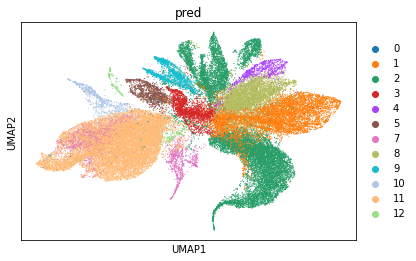

In [9]:
adata = anndata.AnnData(unlabeled_X)
adata.obs['pred'] = pd.Categorical(results)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['pred'], size=5)